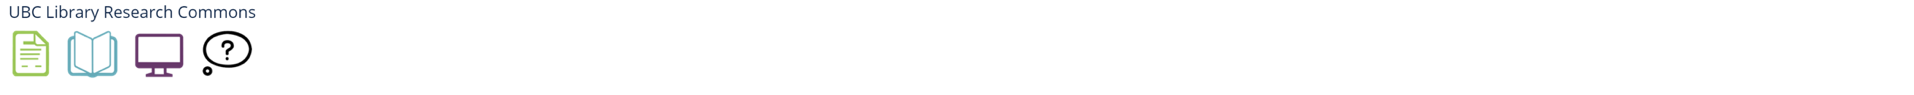

# Workshop: R for Statistical Analysis

<h4> Data Analysis Team: </h4>                                                                
    
* Matty Jullamon (GAA)
* Amir Michalovich (GAA)
* Jeremy Buhler (Data Librarian)
* Sarah Parker (Data Librarian)

# Pre-workshop setup

<h4> Download and install R </h4>

*For Windows:*

1. Visit [R Project](https://www.r-project.org/) to learn about R versions.
1. Download and install R from your preferred CRAN mirror [here](https://cran.r-project.org/mirrors.html)
    1. Choose "0-Cloud" or a mirror site near you.

*For Mac:*
1. Check that your macOS system is up-to-date
1. Download and install R from [The Comprehensive R Archive Network](https://cran.r-project.org/)

<h4> Download and install R studio </h4>

*For Windows and Mac:*
1. Download and install R Studio from [here](https://rstudio.com/products/rstudio/download/#download)

# Learning Objectives

* Learn how to identify the types of variables in R 

* Learn the basic commands for descriptive statistics

* Learn the basic commands for inference statistics

# Overview of Quantative Research Process

A systamatic research process that involves collecting objective, measureable data, using statistics to analyze the data, and generalizing the results to a larger population to explain a phenomena. Usually, software programs assist on data analysis.

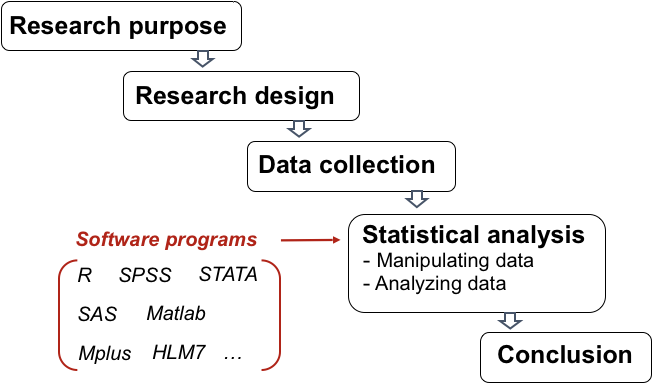

# Data Analysis in Quantitative Research

<h4> Definitions</h4>

* Data refers to facts or pieces of information that can either be quantitative or qualitative.
* Variable refers to any property that can be observed or measured.


<h4> Types of Variables</h4>

It is important to understand the different types of variables because they will determine the statistical analysis method. 

|Type      |  Description                                                | Example                   |
|----------|-------------------------------------------------------------|---------------------------|
|Nominal   |Labels or Descriptions that cannot be ordered                |Gender           | 
|Ordinal   |Labels or Descriptions that can be ordered                   |Education Level|
|Interval  |Numeric values with equal magnitude, doesn't have absolute zero|SAT scores|
|Ratio     |Numeric values with equal magnitude, does have absolute zero| Age|


<h4> Categorize these variables in R </h4>


Nominal/Ordinal -> Character or Factor

Intervel/Ratio -> Numeric or Integer


<h4> Definitions </h4>

* Character: Text
* Factor: Integer associated with a specific category
* Numeric: Number with decimal point
* Integer: Number with no decimal point

# Getting Started

<h4> Set working directory in R studio </h4>

You can set the working directory using <b>Session</b> > <b>Set Working Directory</b> > <b>Choose Directory</b>.

<h4> Loading a built-in R dataset </h4>

<h4> About the data </h4>

<b>3 Measures Of Ability: SATV, SATQ, ACT</b>:
"Self reported scores on the SAT Verbal, SAT Quantitative and ACT were collected as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. Age, gender, and education are also reported. The data from 700 subjects are included here as a demonstration set for correlation and analysis" [(Revelle et al., 2009).](https://www.rdocumentation.org/packages/psych/versions/1.9.12.31/topics/sat.act)

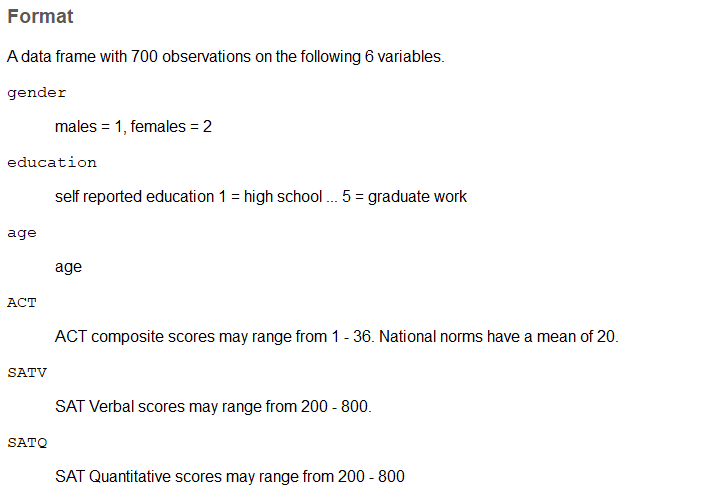

<h4> Write and run the following commands to load the dataset</h4>

install.packages("psych") #install this if you haven't done so.

library(psych)

scores <- sat.act

In [ ]:
scores <-read.csv("sat.act.csv")

# Identifying and Renaming Variables

<h4> str(df ): To check the structure of your data </h4>

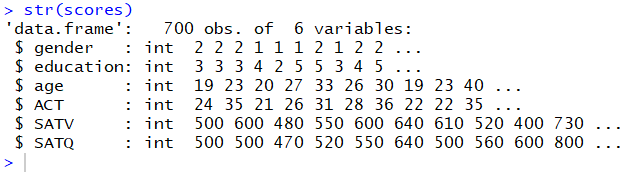

Question: What do you notice?

<h4> as.factor(df$columnname): To change a variable to factor </h4>

In [64]:
scores$gender <- as.factor(scores$gender)

<h4> is.factor(df$columnname): To check if a variable is defined as factor </h4>

In [62]:
is.factor(scores$gender)

[1] TRUE

<h4> Extra information </h4>

is.integer(df$columnname): To check if a variable is defined as integer 

is.numeric(df$columnname): To check if a variable is defined as numeric

is.character(df$columnname): To check if a varible is defined as character

as.integer(df$columnname): To change a variable to integer

as.numeric(df$columnname): To change a variable to numeric

as.character($columnndfame): To change a variable to character

# Exercise #1

* Using as.factor command, change 'education' to factor.
* Using is.factor command, check if 'education is defined as factor. 

# Answer to Exercise #1

In [75]:
scores$education <- as.factor(scores$education) 

In [76]:
is.factor(scores$education)

[1] TRUE

# Descriptive Statistics

Descriptive statistics summarize the data in a meaningful way. The purpose of using descriptive statistics is to explore the observed data and not to draw inferences.

We will use the psych package functions to perform descriptive statistics.

<h4>describe(df): To obtain descriptive statistics for all variables</h4>

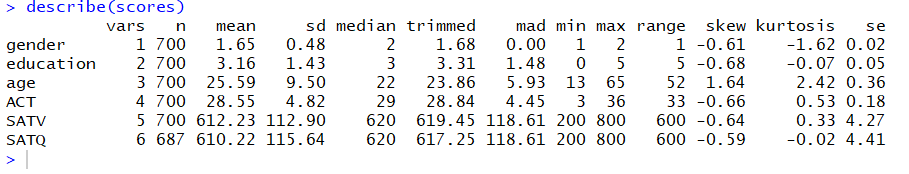

<h4> hist(df$columnname): To graphically descibe the distribution using histogram </h4>

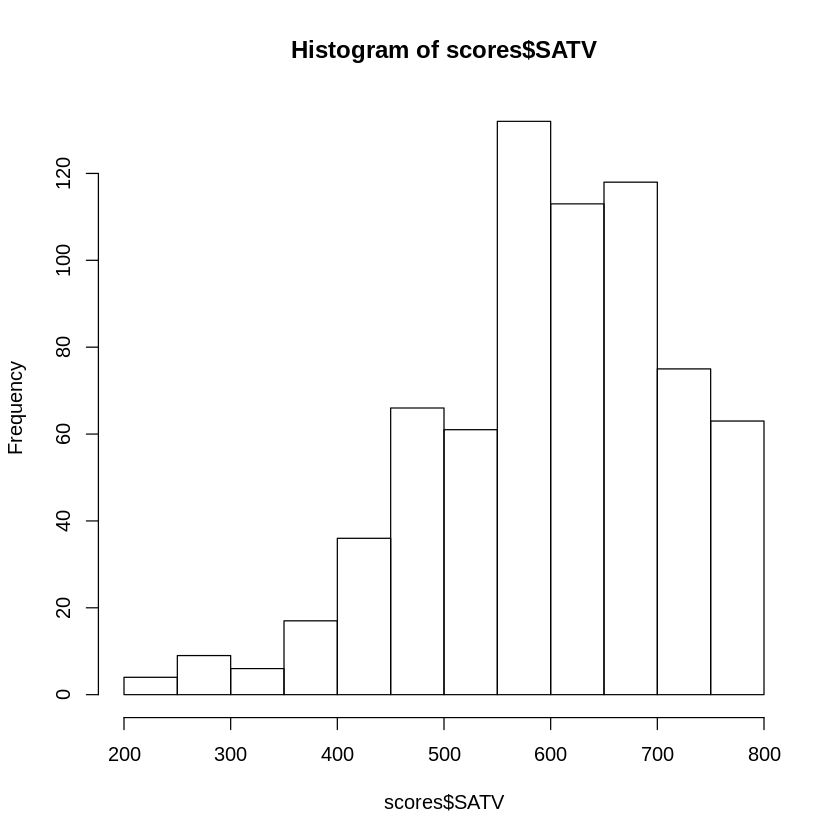

In [78]:
hist(scores$SATV)

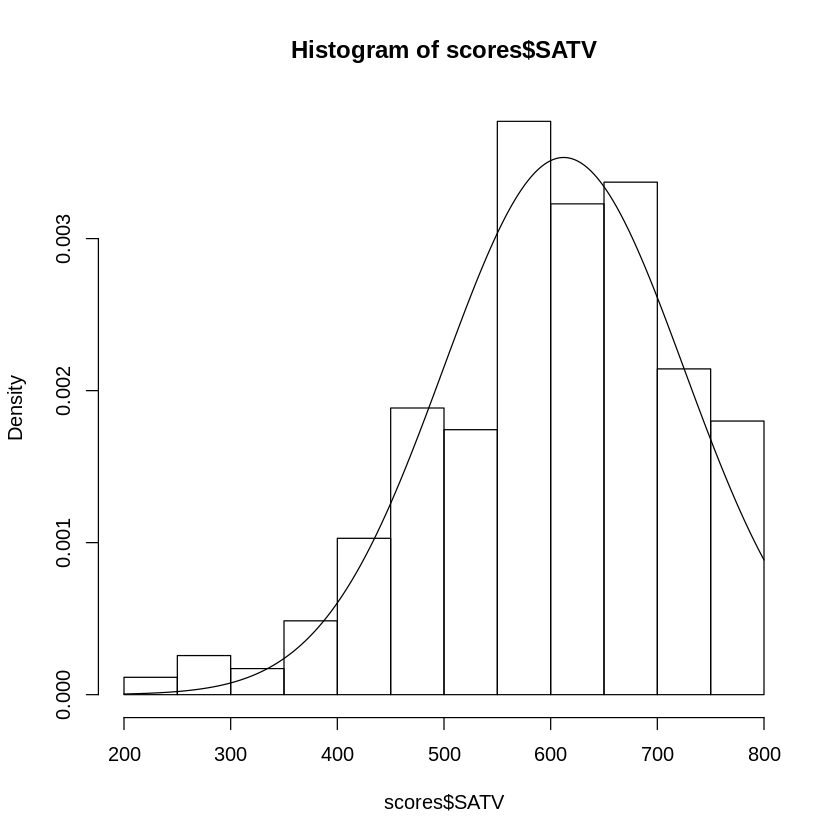

In [95]:
# To add the distribution curve

hist(scores$SATV, freq = F)
x <- 200:800
y <- dnorm(x = x, mean = 612.23, sd = 112.90)
lines(x = x, y = y)

# Inferential Statistics

Unlike descriptive statistics, inferential statistics use the observed data to make inferences about the population. 

In this workshop, we will cover four parametric tests: Independent t-test, One-way ANOVA, Pearson's correlation, & Simple linear regression. These tests are called parametric because they meet the assumptions of probability distribution.

# Model assumptions

Common model assumptions found in parametric tests:

1. Independence
2. Normality
3. Equal variance 

Both Pearson's correlation and Simple linear regression have some additional assumptions. For more information, click on the following links:

[Pearson's correlation assumptions](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/)

[Simple linear regression assumptions](https://www.statisticssolutions.com/assumptions-of-linear-regression/)


# Independent T-test

It is used to see whether there are group difference in numeric data between two groups.

For example, do males and females have different average SAT verbal scores?

H0: Mean SATV for males = Mean SATV for females

H1: Mean SATV for males != Mean SATV for females

In [ ]:
#Write and run this command:

t.test(scores$SATV ~ scores$gender, data = scores, var.eq = TRUE)

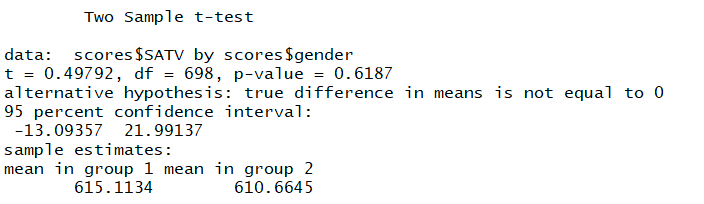

<h4> Interpreting the results </h4>

* t: computing statistics
* df: degrees of freedom 
* p-value: Statistical significance. 0.6187 is bigger than α = 0.05 so that means we must retain the null hypothesis

<h4> Conclusion </h4>

There was no statistically significant difference in SAT verbal scores between males and females, t(698) = 0.50, p = 0.62.

# One-way ANOVA

It is used to determine whether there are group differences in numeric data between more than two groups

For example, do SAT verbal scores significantly differ by educational levels (1= HS, 2= some college degree, 3 = 2-year college degree, 4= 4-year college degree, 5= graduate work)?

H0: Mean SATV of students who have HS degree = Mean SATV of students who have some college degree = ... 

H1: Mean SATV of students who have HS degree != Mean SATV of students who have some college degree != ... 

In [ ]:
#Write and run this command:

m1 <- aov(scores$SATV ~ scores$education, data = scores)
summary(m1)

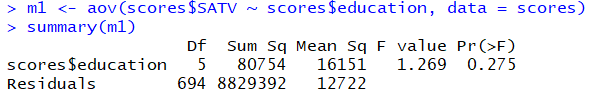

<h4> Interpreting the results </h4>

* df: degree of freedom
* sum sq: sum of squares 
* mean sq: mean squares 
* F value: computing statistics
* Pr(>F): statistical significance. 0.275 is bigger than α = 0.05 so that means we must retain the null hypothesis. We do not have to run the post hoc tests because the group differences are not significant.


Does this make sense?

Check using boxplot. 


In [ ]:
# Write and run this command:

boxplot(scores$SATV ~ scores$education)

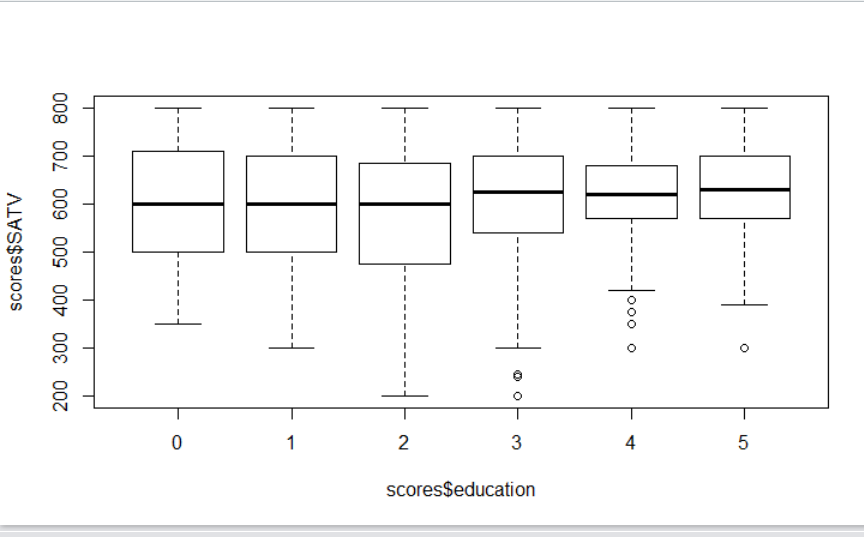

<h4> Conclusion </h4>

There were no significant group differences in SAT verbal scores according to students' educational levels, F(5, 694) = 1.269, p = 0.275.

<h4> Extra information </h4>

There are different types of [post hoc tests](https://www.rdocumentation.org/packages/DescTools/versions/0.99.36/topics/PostHocTest), but the Tukey's HSD is the most popular post hoc test for comparing multiple pairings.


In [2]:
# R command for Tukey's HSD:

# TukeyHSD(aov(scores$SATV ~ scores$education, data = scores), conf.level=.95) 

# Pearson's Correlation

It is used to examine relationships between variables (represented by numeric data)

For example, Is there a relationship between SATV and SATQ?

H0: There is no relationship between SATV and SATQ.

H1: There is a relationship between SATV and SATQ.

In [ ]:
# Write and run this command:

cor.test(scores$SATV,scores$SATQ)

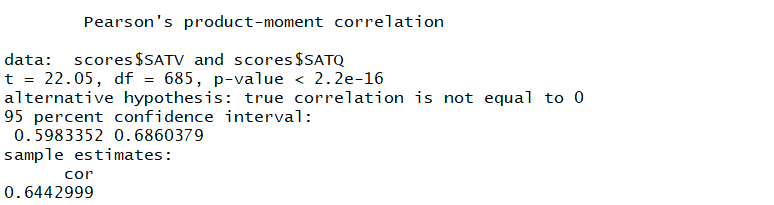

In [ ]:
# Write and run this command to see scatterplot:

plot(scores$SATV,scores$SATQ)
abline(lm(scores$SATQ ~ scores$SATV)) #to add regression line

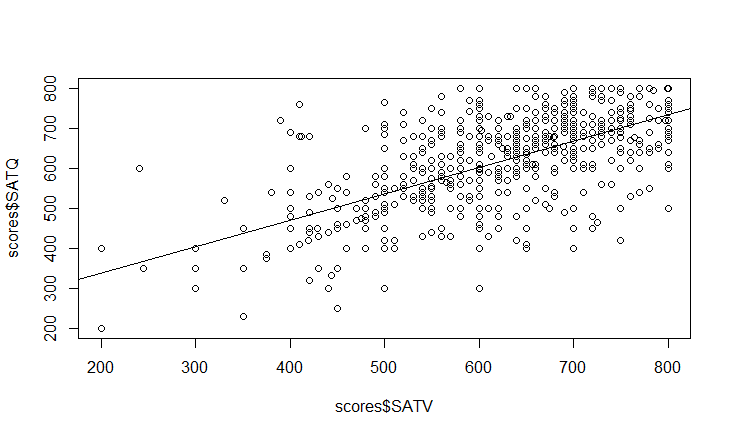

<h4> Conclusion </h4> 

There was statistically significant positive correlation between SAT verbal scores and SAT Quantitative scores (r = 0.644, p < 0.001).

# Simple Linear Regression (for your reference)

It is used to explain/predict the phenomenon of interest based one independent variable.

For example, do ACT scores predict SAT verbal scores?

In [ ]:
# Write and run this command:

m2 <- lm(scores$SATV ~ scores$ACT)
summary(m2)

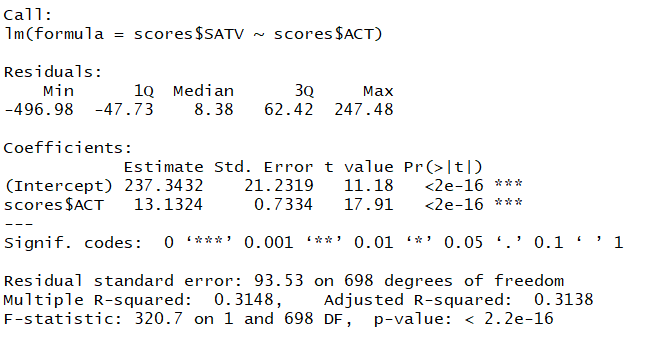

<h4> Interpreting the results </h4>

* The estimated regression line equation: SATV = 237.34 + 13.13(ACT scores)
* 31% of the variability in the SAT verbal scores was explained by the variables in the regression model.
* The overall regression model significantly explained the SAT verbal scores.


<h4> Conclusion </h4> 

ACT scores significantly predicted SAT verbal scores. We would expect 13.13 points increase in SAT verbal scores for every one point increase in ACT score, assuming all the other variables are held constant. 


# Questions?

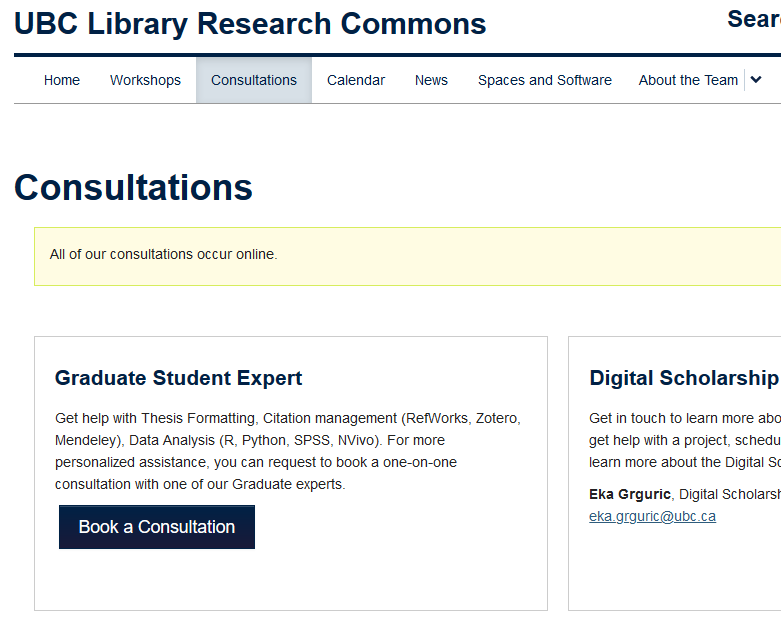

Reference(s);

Revelle, William, Wilt, Joshua, and Rosenthal, Allen. (2009). Personality and Cognition: The Personality-Cognition Link. In Gruszka, Alexandra and Matthews, Gerald and Szymura, Blazej (Eds.) Handbook of Individual Differences in Cognition: Attention, Memory and Executive Control, Springer.